# Part 1: Data Cleaning and Pre Processing

<b>The objectives of Part1 jupyter note book is to merge all the 4 sheets of our manin dataframe and create one master dataframe which includes common columns, all Individuel columns will be aggregated under one columns called "Other". This master dataframe going to be used for our analysis. As each sheet has some common columns and some indivudal special columns associated to the type of source. In this case our approch is to Aggregate all the Individual columns under one columns and named it "Other", create a column called sector to refere to reference all the records associated to that imported/merged sheet, Unify the names of commun columns.</b>

In [1]:
#Importing Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
industrial_xls = pd.read_excel("Enviroment - US - Co2 emmissons.xlsx","Industrial")
residential_xls = pd.read_excel("Enviroment - US - Co2 emmissons.xlsx","Residential")
transportation_xls = pd.read_excel("Enviroment - US - Co2 emmissons.xlsx","Transprotation")
electric_xls = pd.read_excel("Enviroment - US - Co2 emmissons.xlsx","Electric Power Services")

#Sheet 1: 
# Read the Industrial sheet and see how the dataframe look like 
industrial_xls

,Month,Coal Industrial Sector CO2 Emissions,Coal Coke Net Imports CO2 Emissions,Natural Gas Industrial Sector CO2 Emissions,Distillate Fuel Oil Industrial Sector CO2 Emissions,HGL Industrial Sector CO2 Emissions,Kerosene Industrial Sector CO2 Emissions,Lubricants Industrial Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Industrial Sector CO2 Emissions",Petroleum Coke Industrial Sector CO2 Emissions,Residual Fuel Oil Industrial Sector CO2 Emissions,Other Petroleum Products Industrial Sector CO2 Emissions,"Petroleum, Excluding Biofuels, Industrial Sector CO2 Emissions",Industrial Share of Electric Power Sector CO2 Emissions,Total Industrial Sector CO2 Emissions
0,NaT,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,33.48,-0.127,42.37,9.606,3.241,1.817,0.565,1.415,4.722,12.202,8.753,42.32,42.649,160.692
2,1973-02-01,30.834,-0.014,36.54,10.426,2.486,1.557,0.558,1.345,3.886,13.099,7.673,41.029,38.783,147.171
3,1973-03-01,31.625,-0.228,38.261,9.487,1.764,0.899,0.602,1.507,4.274,15.176,8.658,42.365,40.381,152.403
4,1973-04-01,31.119,-0.073,42.224,6.775,1.77,0.707,0.533,1.464,4.049,11.269,8.229,34.796,39.717,147.782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,7.697,-0.298,42.121,7.951,3.05,0.037,0.338,1.118,2.011,0.215,7.466,22.187,32.464,104.171
579,2021-03-01,8.316,-0.018,45.251,9.995,4.996,0.003,0.317,1.367,3.693,0.268,11.228,31.866,27.32,112.735
580,2021-04-01,9.238,-0.47,43.856,8.956,4.529,0.01,0.359,1.363,3.701,0.127,12.066,31.11,28.199,111.933
581,2021-05-01,8.482,-0.418,43.242,8.083,5.608,0.001,0.35,1.456,5.285,0.241,9.961,30.984,31.72,114.01


In [3]:
# check industrial_xls info
industrial_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 15 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Month                                                               582 non-null    datetime64[ns]
 1   Coal Industrial Sector CO2 Emissions                                583 non-null    object        
 2   Coal Coke Net Imports CO2 Emissions                                 583 non-null    object        
 3   Natural Gas Industrial Sector CO2 Emissions                         583 non-null    object        
 4   Distillate Fuel Oil Industrial Sector CO2 Emissions                 583 non-null    object        
 5   HGL Industrial Sector CO2 Emissions                                 583 non-null    object        
 6   Kerosene Industrial Sector CO2 Emissions                  

In [4]:
# Now, do the the same for the other 3 sheets
#Read the Residential sheet and see how the dataframe look like 
residential_xls

,Month,Coal Residential Sector CO2 Emissions,"Natural Gas, Excluding Supplemental Gaseous Fuels, Residential Sector CO2 Emissions",Distillate Fuel Oil Residential Sector CO2 Emissions,HGL Residential Sector CO2 Emissions,Kerosene Residential Sector CO2 Emissions,Petroleum Residential Sector CO2 Emissions,Residential Share of Electric Power Sector CO2 Emissions,Total Energy Residential Sector CO2 Emissions
0,NaT,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,1.142,45.623,22.796,5.79,2.651,31.237,40.771,118.773
2,1973-02-01,0.978,40.402,19.474,5.089,2.272,26.834,35.238,103.453
3,1973-03-01,0.768,35.06,15.231,3.771,1.311,20.313,33.477,89.618
4,1973-04-01,0.503,25.186,10.657,2.998,1.031,14.686,29.694,70.069
...,...,...,...,...,...,...,...,...,...
578,2021-02-01,Not Available,47.201,3.335,5.348,0.284,8.966,56.322,112.489
579,2021-03-01,Not Available,31.09,2.767,3.845,0.023,6.635,41.017,78.741
580,2021-04-01,Not Available,18.683,1.888,2.702,0.074,4.664,33.711,57.058
581,2021-05-01,Not Available,11.803,1.634,1.847,0.007,3.488,38.907,54.198


In [5]:
# check industrial_xls info
residential_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 9 columns):
 #   Column                                                                               Non-Null Count  Dtype         
---  ------                                                                               --------------  -----         
 0   Month                                                                                582 non-null    datetime64[ns]
 1   Coal Residential Sector CO2 Emissions                                                583 non-null    object        
 2   Natural Gas, Excluding Supplemental Gaseous Fuels, Residential Sector CO2 Emissions  583 non-null    object        
 3   Distillate Fuel Oil Residential Sector CO2 Emissions                                 583 non-null    object        
 4   HGL Residential Sector CO2 Emissions                                                 583 non-null    object        
 5   Kerosene Residential Sector CO2 Emissions   

In [6]:
#Read the transportation sheet and see how the dataframe look like 
transportation_xls

,Month,Coal Transportation Sector CO2 Emissions,Natural Gas Transportation Sector CO2 Emissions,Aviation Gasoline Transportation Sector CO2 Emissions,"Distillate Fuel Oil, Excluding Biodiesel, Transportation Sector CO2 Emissions",HGL Transportation Sector CO2 Emissions,Jet Fuel Transportation Sector CO2 Emissions,Lubricants Transportation Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Transportation Sector CO2 Emissions",Residual Fuel Oil Transportation Sector CO2 Emissions,"Petroleum, Excluding Biofuels, Transportation Sector CO2 Emissions",Transportation Share of Electric Power Sector CO2 Emissions,Total Energy Transportation Sector CO2 Emissions
0,NaT,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,0,4.192,0.428,13.305,0.264,13.472,0.472,69.051,4.783,101.775,0.209,106.176
2,1973-02-01,0,3.796,0.431,13.857,0.239,11.873,0.466,65.62,5.134,97.62,0.181,101.597
3,1973-03-01,0.004,3.598,0.459,13.877,0.264,12.083,0.503,73.513,5.949,106.647,0.181,110.43
4,1973-04-01,0.028,3.276,0.446,12.244,0.256,11.954,0.446,71.453,4.417,101.215,0.169,104.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,0,5.318,0.053,32.237,0.032,12.521,0.375,69.356,2.794,117.369,0.245,122.931
579,2021-03-01,0,4.633,0.102,37.739,0.035,14.698,0.351,84.769,3.662,141.357,0.194,146.184
580,2021-04-01,0,4.019,0.155,37.915,0.034,15.712,0.398,84.501,1.594,140.309,0.179,144.507
581,2021-05-01,0,3.786,0.099,39.462,0.035,16.73,0.389,90.297,3.228,150.239,0.181,154.206


In [7]:
# Check transportation_xls info
transportation_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 13 columns):
 #   Column                                                                         Non-Null Count  Dtype         
---  ------                                                                         --------------  -----         
 0   Month                                                                          582 non-null    datetime64[ns]
 1   Coal Transportation Sector CO2 Emissions                                       583 non-null    object        
 2   Natural Gas Transportation Sector CO2 Emissions                                583 non-null    object        
 3   Aviation Gasoline Transportation Sector CO2 Emissions                          583 non-null    object        
 4   Distillate Fuel Oil, Excluding Biodiesel, Transportation Sector CO2 Emissions  583 non-null    object        
 5   HGL Transportation Sector CO2 Emissions                                        583 no

In [8]:
#Read the electric sheet and see how the dataframe look like 
electric_xls

,Month,Coal Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Petroleum Coke Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Geothermal Energy Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
0,NaT,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,73.112,12.163,2.397,0.128,23.698,26.223,Not Available,Not Available,111.499
2,1973-02-01,65.369,11.696,2.08,0.106,19.886,22.071,Not Available,Not Available,99.137
3,1973-03-01,65.006,13.979,1.181,0.083,18.851,20.115,Not Available,Not Available,99.1
4,1973-04-01,61.717,14.612,1.031,0.13,15.783,16.944,Not Available,Not Available,93.273
...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,86.732,42.978,0.805,0.785,0.394,1.983,0.032,0.817,132.543
579,2021-03-01,62.3,40.582,0.268,0.735,0.31,1.313,0.035,0.904,105.136
580,2021-04-01,54.281,41.075,0.272,0.434,0.288,0.995,0.034,0.875,97.26
581,2021-05-01,64.23,44.503,0.285,0.569,0.311,1.165,0.035,0.904,110.839


In [9]:
# Check electric_xls info
electric_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                                                                                      Non-Null Count  Dtype         
---  ------                                                                                      --------------  -----         
 0   Month                                                                                       582 non-null    datetime64[ns]
 1   Coal Electric Power Sector CO2 Emissions                                                    583 non-null    object        
 2   Natural Gas Electric Power Sector CO2 Emissions                                             583 non-null    object        
 3   Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions  583 non-null    object        
 4   Petroleum Coke Electric Power Sector CO2 Emissions                                          583 non-null    object        

In [10]:
# Unifying the name of commun columns for all 4 columns by deploying rename fucntion, each sheet at a time.

industrial_xls.columns

Index(['Month', 'Coal Industrial Sector CO2 Emissions',
       'Coal Coke Net Imports CO2 Emissions',
       'Natural Gas Industrial Sector CO2 Emissions',
       'Distillate Fuel Oil Industrial Sector CO2 Emissions',
       'HGL Industrial Sector CO2 Emissions',
       'Kerosene Industrial Sector CO2 Emissions',
       'Lubricants Industrial Sector CO2 Emissions',
       'Motor Gasoline, Excluding Ethanol, Industrial Sector CO2 Emissions',
       'Petroleum Coke Industrial Sector CO2 Emissions',
       'Residual Fuel Oil Industrial Sector CO2 Emissions',
       'Other Petroleum Products Industrial Sector CO2 Emissions',
       'Petroleum, Excluding Biofuels, Industrial Sector CO2 Emissions',
       'Industrial Share of Electric Power Sector CO2 Emissions',
       'Total Industrial Sector CO2 Emissions'],
      dtype='object')

In [11]:
# rename the common column names 
industrial_xls.rename(columns = {'Coal Industrial Sector CO2 Emissions':'Coal_CO2Emissions',
                                 'Natural Gas Industrial Sector CO2 Emissions':'NaturalGas_CO2Emissions',
                                'Distillate Fuel Oil Industrial Sector CO2 Emissions':'Distillate_FuelOil_CO2Emissions',
                                'HGL Industrial Sector CO2 Emissions':'HGL_CO2Emissions',
                                'Petroleum Coke Industrial Sector CO2 Emissions':'Petroleum_CO2Emissions',
                                'Residual Fuel Oil Industrial Sector CO2 Emissions':'Residual_fuelOil_CO2Emissions',
                                'Industrial Share of Electric Power Sector CO2 Emissions':'Share_OfElectricPower_CO2Emissions',
                                'Total Industrial Sector CO2 Emissions':'Total_CO2Emissions'},inplace = True)


In [12]:
# check the new columns' names
industrial_xls.head()

,Month,Coal_CO2Emissions,Coal Coke Net Imports CO2 Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Kerosene Industrial Sector CO2 Emissions,Lubricants Industrial Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Industrial Sector CO2 Emissions",Petroleum_CO2Emissions,Residual_fuelOil_CO2Emissions,Other Petroleum Products Industrial Sector CO2 Emissions,"Petroleum, Excluding Biofuels, Industrial Sector CO2 Emissions",Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
0,NaT,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,33.48,-0.127,42.37,9.606,3.241,1.817,0.565,1.415,4.722,12.202,8.753,42.32,42.649,160.692
2,1973-02-01,30.834,-0.014,36.54,10.426,2.486,1.557,0.558,1.345,3.886,13.099,7.673,41.029,38.783,147.171
3,1973-03-01,31.625,-0.228,38.261,9.487,1.764,0.899,0.602,1.507,4.274,15.176,8.658,42.365,40.381,152.403
4,1973-04-01,31.119,-0.073,42.224,6.775,1.77,0.707,0.533,1.464,4.049,11.269,8.229,34.796,39.717,147.782


In [13]:
# Create a new columns called Sector with static values = "industrial"
industrial_xls.insert(1,"Sector","industrial", True)


In [14]:
# Remove the first row before start to do any calculations and merges
industrial_xls.drop([0], axis=0, inplace = True)

industrial_xls

,Month,Sector,Coal_CO2Emissions,Coal Coke Net Imports CO2 Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Kerosene Industrial Sector CO2 Emissions,Lubricants Industrial Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Industrial Sector CO2 Emissions",Petroleum_CO2Emissions,Residual_fuelOil_CO2Emissions,Other Petroleum Products Industrial Sector CO2 Emissions,"Petroleum, Excluding Biofuels, Industrial Sector CO2 Emissions",Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
1,1973-01-01,industrial,33.48,-0.127,42.37,9.606,3.241,1.817,0.565,1.415,4.722,12.202,8.753,42.32,42.649,160.692
2,1973-02-01,industrial,30.834,-0.014,36.54,10.426,2.486,1.557,0.558,1.345,3.886,13.099,7.673,41.029,38.783,147.171
3,1973-03-01,industrial,31.625,-0.228,38.261,9.487,1.764,0.899,0.602,1.507,4.274,15.176,8.658,42.365,40.381,152.403
4,1973-04-01,industrial,31.119,-0.073,42.224,6.775,1.77,0.707,0.533,1.464,4.049,11.269,8.229,34.796,39.717,147.782
5,1973-05-01,industrial,31.643,-0.321,44.564,8.962,2.448,0.592,0.63,1.598,4.477,12.156,8.687,39.55,42.427,157.863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,industrial,7.697,-0.298,42.121,7.951,3.05,0.037,0.338,1.118,2.011,0.215,7.466,22.187,32.464,104.171
579,2021-03-01,industrial,8.316,-0.018,45.251,9.995,4.996,0.003,0.317,1.367,3.693,0.268,11.228,31.866,27.32,112.735
580,2021-04-01,industrial,9.238,-0.47,43.856,8.956,4.529,0.01,0.359,1.363,3.701,0.127,12.066,31.11,28.199,111.933
581,2021-05-01,industrial,8.482,-0.418,43.242,8.083,5.608,0.001,0.35,1.456,5.285,0.241,9.961,30.984,31.72,114.01


In [15]:
# Sum columns "Coal_CO2Emissions" & "Coal Coke Net Imports CO2 Emissions" then delete them to add the total to the dataframe 

sum_coal = industrial_xls.loc[:,["Coal_CO2Emissions","Coal Coke Net Imports CO2 Emissions"]].sum(axis = 1) 
print(sum_coal)

1      33.353
2      30.820
3      31.397
4      31.046
5      31.322
        ...  
578     7.399
579     8.298
580     8.768
581     8.064
582     7.988
Length: 582, dtype: float64


In [16]:
# Delete "Coal_CO2Emissions" & "Coal Coke Net Imports CO2 Emissions" as we need to add the total of them,
# which is sum_coal that we created in above 
industrial_xls.drop(["Coal_CO2Emissions","Coal Coke Net Imports CO2 Emissions"], axis=1, inplace = True)

industrial_xls

,Month,Sector,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Kerosene Industrial Sector CO2 Emissions,Lubricants Industrial Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Industrial Sector CO2 Emissions",Petroleum_CO2Emissions,Residual_fuelOil_CO2Emissions,Other Petroleum Products Industrial Sector CO2 Emissions,"Petroleum, Excluding Biofuels, Industrial Sector CO2 Emissions",Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
1,1973-01-01,industrial,42.37,9.606,3.241,1.817,0.565,1.415,4.722,12.202,8.753,42.32,42.649,160.692
2,1973-02-01,industrial,36.54,10.426,2.486,1.557,0.558,1.345,3.886,13.099,7.673,41.029,38.783,147.171
3,1973-03-01,industrial,38.261,9.487,1.764,0.899,0.602,1.507,4.274,15.176,8.658,42.365,40.381,152.403
4,1973-04-01,industrial,42.224,6.775,1.77,0.707,0.533,1.464,4.049,11.269,8.229,34.796,39.717,147.782
5,1973-05-01,industrial,44.564,8.962,2.448,0.592,0.63,1.598,4.477,12.156,8.687,39.55,42.427,157.863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,industrial,42.121,7.951,3.05,0.037,0.338,1.118,2.011,0.215,7.466,22.187,32.464,104.171
579,2021-03-01,industrial,45.251,9.995,4.996,0.003,0.317,1.367,3.693,0.268,11.228,31.866,27.32,112.735
580,2021-04-01,industrial,43.856,8.956,4.529,0.01,0.359,1.363,3.701,0.127,12.066,31.11,28.199,111.933
581,2021-05-01,industrial,43.242,8.083,5.608,0.001,0.35,1.456,5.285,0.241,9.961,30.984,31.72,114.01


In [17]:
# insert the new coal_CO2Emissions column 
Coal_CO2Emissions = sum_coal
industrial_xls.insert(2,"Coal_CO2Emissions", Coal_CO2Emissions, True)

industrial_xls


,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Kerosene Industrial Sector CO2 Emissions,Lubricants Industrial Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Industrial Sector CO2 Emissions",Petroleum_CO2Emissions,Residual_fuelOil_CO2Emissions,Other Petroleum Products Industrial Sector CO2 Emissions,"Petroleum, Excluding Biofuels, Industrial Sector CO2 Emissions",Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
1,1973-01-01,industrial,33.353,42.37,9.606,3.241,1.817,0.565,1.415,4.722,12.202,8.753,42.32,42.649,160.692
2,1973-02-01,industrial,30.820,36.54,10.426,2.486,1.557,0.558,1.345,3.886,13.099,7.673,41.029,38.783,147.171
3,1973-03-01,industrial,31.397,38.261,9.487,1.764,0.899,0.602,1.507,4.274,15.176,8.658,42.365,40.381,152.403
4,1973-04-01,industrial,31.046,42.224,6.775,1.77,0.707,0.533,1.464,4.049,11.269,8.229,34.796,39.717,147.782
5,1973-05-01,industrial,31.322,44.564,8.962,2.448,0.592,0.63,1.598,4.477,12.156,8.687,39.55,42.427,157.863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,industrial,7.399,42.121,7.951,3.05,0.037,0.338,1.118,2.011,0.215,7.466,22.187,32.464,104.171
579,2021-03-01,industrial,8.298,45.251,9.995,4.996,0.003,0.317,1.367,3.693,0.268,11.228,31.866,27.32,112.735
580,2021-04-01,industrial,8.768,43.856,8.956,4.529,0.01,0.359,1.363,3.701,0.127,12.066,31.11,28.199,111.933
581,2021-05-01,industrial,8.064,43.242,8.083,5.608,0.001,0.35,1.456,5.285,0.241,9.961,30.984,31.72,114.01


In [18]:
# Sum columns "Petroleum_CO2Emissions", "Other Petroleum Products Industrial Sector CO2 Emissions"
# and "Petroleum, Excluding Biofuels, Industrial Sector CO2 Emissions"
sum_petroleum = industrial_xls.loc[:,["Petroleum_CO2Emissions",
                                      "Other Petroleum Products Industrial Sector CO2 Emissions",
                                     "Petroleum, Excluding Biofuels, Industrial Sector CO2 Emissions"]].sum(axis = 1) 
print(sum_petroleum)


1      55.795
2      52.588
3      55.297
4      47.074
5      52.714
        ...  
578    31.664
579    46.787
580    46.877
581    46.230
582    45.183
Length: 582, dtype: float64


In [19]:
# Delete the three columns that just sumes togather in above step, then check the result
industrial_xls.drop(["Petroleum_CO2Emissions",
                     "Other Petroleum Products Industrial Sector CO2 Emissions",
                     "Petroleum, Excluding Biofuels, Industrial Sector CO2 Emissions"],axis = 1, inplace = True) 
industrial_xls


,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Kerosene Industrial Sector CO2 Emissions,Lubricants Industrial Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Industrial Sector CO2 Emissions",Residual_fuelOil_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
1,1973-01-01,industrial,33.353,42.37,9.606,3.241,1.817,0.565,1.415,12.202,42.649,160.692
2,1973-02-01,industrial,30.820,36.54,10.426,2.486,1.557,0.558,1.345,13.099,38.783,147.171
3,1973-03-01,industrial,31.397,38.261,9.487,1.764,0.899,0.602,1.507,15.176,40.381,152.403
4,1973-04-01,industrial,31.046,42.224,6.775,1.77,0.707,0.533,1.464,11.269,39.717,147.782
5,1973-05-01,industrial,31.322,44.564,8.962,2.448,0.592,0.63,1.598,12.156,42.427,157.863
...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,industrial,7.399,42.121,7.951,3.05,0.037,0.338,1.118,0.215,32.464,104.171
579,2021-03-01,industrial,8.298,45.251,9.995,4.996,0.003,0.317,1.367,0.268,27.32,112.735
580,2021-04-01,industrial,8.768,43.856,8.956,4.529,0.01,0.359,1.363,0.127,28.199,111.933
581,2021-05-01,industrial,8.064,43.242,8.083,5.608,0.001,0.35,1.456,0.241,31.72,114.01


In [20]:
# Insert the new calculated column "sum_petroleum" to the dataframe and change it name
Petroleum_CO2Emissions = sum_petroleum
industrial_xls.insert(6,"Petroleum_CO2Emissions",Petroleum_CO2Emissions, True)
industrial_xls

,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Petroleum_CO2Emissions,Kerosene Industrial Sector CO2 Emissions,Lubricants Industrial Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Industrial Sector CO2 Emissions",Residual_fuelOil_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
1,1973-01-01,industrial,33.353,42.37,9.606,3.241,55.795,1.817,0.565,1.415,12.202,42.649,160.692
2,1973-02-01,industrial,30.820,36.54,10.426,2.486,52.588,1.557,0.558,1.345,13.099,38.783,147.171
3,1973-03-01,industrial,31.397,38.261,9.487,1.764,55.297,0.899,0.602,1.507,15.176,40.381,152.403
4,1973-04-01,industrial,31.046,42.224,6.775,1.77,47.074,0.707,0.533,1.464,11.269,39.717,147.782
5,1973-05-01,industrial,31.322,44.564,8.962,2.448,52.714,0.592,0.63,1.598,12.156,42.427,157.863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,industrial,7.399,42.121,7.951,3.05,31.664,0.037,0.338,1.118,0.215,32.464,104.171
579,2021-03-01,industrial,8.298,45.251,9.995,4.996,46.787,0.003,0.317,1.367,0.268,27.32,112.735
580,2021-04-01,industrial,8.768,43.856,8.956,4.529,46.877,0.01,0.359,1.363,0.127,28.199,111.933
581,2021-05-01,industrial,8.064,43.242,8.083,5.608,46.230,0.001,0.35,1.456,0.241,31.72,114.01


In [21]:
# Sum columns "Kerosene Industrial Sector CO2 Emissions", "Lubricants Industrial Sector CO2 Emissions",
# and Motor Gasoline, Excluding Ethanol, Industrial Sector CO2 Emissions, the new calculation field will called
# "Other_CO2Emissions"

Other_CO2Emissions = industrial_xls.loc[:,["Kerosene Industrial Sector CO2 Emissions",
                                      "Lubricants Industrial Sector CO2 Emissions",
                                     "Motor Gasoline, Excluding Ethanol, Industrial Sector CO2 Emissions"]].sum(axis = 1) 
print(Other_CO2Emissions)

1      3.797
2      3.460
3      3.008
4      2.704
5      2.820
       ...  
578    1.493
579    1.687
580    1.732
581    1.807
582    1.743
Length: 582, dtype: float64


In [22]:
# Delete the three columns that just sums togather in above step, then check the result
industrial_xls.drop(["Kerosene Industrial Sector CO2 Emissions",
                     "Lubricants Industrial Sector CO2 Emissions",
                    "Motor Gasoline, Excluding Ethanol, Industrial Sector CO2 Emissions"],axis = 1, inplace = True) 
industrial_xls

,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Petroleum_CO2Emissions,Residual_fuelOil_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
1,1973-01-01,industrial,33.353,42.37,9.606,3.241,55.795,12.202,42.649,160.692
2,1973-02-01,industrial,30.820,36.54,10.426,2.486,52.588,13.099,38.783,147.171
3,1973-03-01,industrial,31.397,38.261,9.487,1.764,55.297,15.176,40.381,152.403
4,1973-04-01,industrial,31.046,42.224,6.775,1.77,47.074,11.269,39.717,147.782
5,1973-05-01,industrial,31.322,44.564,8.962,2.448,52.714,12.156,42.427,157.863
...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,industrial,7.399,42.121,7.951,3.05,31.664,0.215,32.464,104.171
579,2021-03-01,industrial,8.298,45.251,9.995,4.996,46.787,0.268,27.32,112.735
580,2021-04-01,industrial,8.768,43.856,8.956,4.529,46.877,0.127,28.199,111.933
581,2021-05-01,industrial,8.064,43.242,8.083,5.608,46.230,0.241,31.72,114.01


In [23]:
# Insert the new calculated column "Other_CO2Emissions" to the dataframe

industrial_xls.insert(9,"Other_CO2Emissions",Other_CO2Emissions, True)
industrial_xls


,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Petroleum_CO2Emissions,Residual_fuelOil_CO2Emissions,Share_OfElectricPower_CO2Emissions,Other_CO2Emissions,Total_CO2Emissions
1,1973-01-01,industrial,33.353,42.37,9.606,3.241,55.795,12.202,42.649,3.797,160.692
2,1973-02-01,industrial,30.820,36.54,10.426,2.486,52.588,13.099,38.783,3.460,147.171
3,1973-03-01,industrial,31.397,38.261,9.487,1.764,55.297,15.176,40.381,3.008,152.403
4,1973-04-01,industrial,31.046,42.224,6.775,1.77,47.074,11.269,39.717,2.704,147.782
5,1973-05-01,industrial,31.322,44.564,8.962,2.448,52.714,12.156,42.427,2.820,157.863
...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,industrial,7.399,42.121,7.951,3.05,31.664,0.215,32.464,1.493,104.171
579,2021-03-01,industrial,8.298,45.251,9.995,4.996,46.787,0.268,27.32,1.687,112.735
580,2021-04-01,industrial,8.768,43.856,8.956,4.529,46.877,0.127,28.199,1.732,111.933
581,2021-05-01,industrial,8.064,43.242,8.083,5.608,46.230,0.241,31.72,1.807,114.01


In [24]:
# Sheet 2 residential
# read residential tab to check how the dataframe look like, then follow Similar steps
# the objectives is to re-Structure the dataframe to make it compatible for merging and to 
# meet the project requirements.

residential_xls

,Month,Coal Residential Sector CO2 Emissions,"Natural Gas, Excluding Supplemental Gaseous Fuels, Residential Sector CO2 Emissions",Distillate Fuel Oil Residential Sector CO2 Emissions,HGL Residential Sector CO2 Emissions,Kerosene Residential Sector CO2 Emissions,Petroleum Residential Sector CO2 Emissions,Residential Share of Electric Power Sector CO2 Emissions,Total Energy Residential Sector CO2 Emissions
0,NaT,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,1.142,45.623,22.796,5.79,2.651,31.237,40.771,118.773
2,1973-02-01,0.978,40.402,19.474,5.089,2.272,26.834,35.238,103.453
3,1973-03-01,0.768,35.06,15.231,3.771,1.311,20.313,33.477,89.618
4,1973-04-01,0.503,25.186,10.657,2.998,1.031,14.686,29.694,70.069
...,...,...,...,...,...,...,...,...,...
578,2021-02-01,Not Available,47.201,3.335,5.348,0.284,8.966,56.322,112.489
579,2021-03-01,Not Available,31.09,2.767,3.845,0.023,6.635,41.017,78.741
580,2021-04-01,Not Available,18.683,1.888,2.702,0.074,4.664,33.711,57.058
581,2021-05-01,Not Available,11.803,1.634,1.847,0.007,3.488,38.907,54.198


In [25]:
# similler what we did for Industrial sheet,to unifying the name of common columns across all sheets, we going to utilize rename fucntion.
# frist steps we need to read columns names
residential_xls.columns

Index(['Month', 'Coal Residential Sector CO2 Emissions',
       'Natural Gas, Excluding Supplemental Gaseous Fuels, Residential Sector CO2 Emissions',
       'Distillate Fuel Oil Residential Sector CO2 Emissions',
       'HGL Residential Sector CO2 Emissions',
       'Kerosene Residential Sector CO2 Emissions',
       'Petroleum Residential Sector CO2 Emissions',
       'Residential Share of Electric Power Sector CO2 Emissions',
       'Total Energy Residential Sector CO2 Emissions'],
      dtype='object')

In [26]:
# second step, use rename function

# rename the common column names 
residential_xls.rename(columns = {'Coal Residential Sector CO2 Emissions':'Coal_CO2Emissions',
                                 'Natural Gas, Excluding Supplemental Gaseous Fuels, Residential Sector CO2 Emissions':'NaturalGas_CO2Emissions',
                                'Distillate Fuel Oil Residential Sector CO2 Emissions':'Distillate_FuelOil_CO2Emissions',
                                'HGL Residential Sector CO2 Emissions':'HGL_CO2Emissions',
                                'Petroleum Residential Sector CO2 Emissions':'Petroleum_CO2Emissions',
                                'Kerosene Residential Sector CO2 Emissions':'Other_CO2Emissions',
                                'Residential Share of Electric Power Sector CO2 Emissions':'Share_OfElectricPower_CO2Emissions',
                                'Total Energy Residential Sector CO2 Emissions':'Total_CO2Emissions'},inplace = True)




In [27]:
# check the new columns' names by using head method
residential_xls.head()

,Month,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Other_CO2Emissions,Petroleum_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
0,NaT,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,1.142,45.623,22.796,5.79,2.651,31.237,40.771,118.773
2,1973-02-01,0.978,40.402,19.474,5.089,2.272,26.834,35.238,103.453
3,1973-03-01,0.768,35.06,15.231,3.771,1.311,20.313,33.477,89.618
4,1973-04-01,0.503,25.186,10.657,2.998,1.031,14.686,29.694,70.069


In [28]:
# Create a new columns called Sector with static values = "residential"
residential_xls.insert(1,"Sector","residential", True)

In [29]:
residential_xls

,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Other_CO2Emissions,Petroleum_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
0,NaT,residential,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,residential,1.142,45.623,22.796,5.79,2.651,31.237,40.771,118.773
2,1973-02-01,residential,0.978,40.402,19.474,5.089,2.272,26.834,35.238,103.453
3,1973-03-01,residential,0.768,35.06,15.231,3.771,1.311,20.313,33.477,89.618
4,1973-04-01,residential,0.503,25.186,10.657,2.998,1.031,14.686,29.694,70.069
...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,residential,Not Available,47.201,3.335,5.348,0.284,8.966,56.322,112.489
579,2021-03-01,residential,Not Available,31.09,2.767,3.845,0.023,6.635,41.017,78.741
580,2021-04-01,residential,Not Available,18.683,1.888,2.702,0.074,4.664,33.711,57.058
581,2021-05-01,residential,Not Available,11.803,1.634,1.847,0.007,3.488,38.907,54.198


In [30]:
# Remove the first row then check the result
residential_xls.drop([0], axis=0, inplace = True)

residential_xls

,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Other_CO2Emissions,Petroleum_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
1,1973-01-01,residential,1.142,45.623,22.796,5.79,2.651,31.237,40.771,118.773
2,1973-02-01,residential,0.978,40.402,19.474,5.089,2.272,26.834,35.238,103.453
3,1973-03-01,residential,0.768,35.06,15.231,3.771,1.311,20.313,33.477,89.618
4,1973-04-01,residential,0.503,25.186,10.657,2.998,1.031,14.686,29.694,70.069
5,1973-05-01,residential,0.51,17.641,9.038,2.118,0.864,12.02,29.728,59.899
...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,residential,Not Available,47.201,3.335,5.348,0.284,8.966,56.322,112.489
579,2021-03-01,residential,Not Available,31.09,2.767,3.845,0.023,6.635,41.017,78.741
580,2021-04-01,residential,Not Available,18.683,1.888,2.702,0.074,4.664,33.711,57.058
581,2021-05-01,residential,Not Available,11.803,1.634,1.847,0.007,3.488,38.907,54.198


In [31]:
# Sheet 3 Transportation 
# read Transportation tab to check how the dataframe look like, then follow Similar steps 
# the objectives is to re-Structure the dataframe to make it compatible for merging and to 
# meet the project requirement 

transportation_xls

,Month,Coal Transportation Sector CO2 Emissions,Natural Gas Transportation Sector CO2 Emissions,Aviation Gasoline Transportation Sector CO2 Emissions,"Distillate Fuel Oil, Excluding Biodiesel, Transportation Sector CO2 Emissions",HGL Transportation Sector CO2 Emissions,Jet Fuel Transportation Sector CO2 Emissions,Lubricants Transportation Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Transportation Sector CO2 Emissions",Residual Fuel Oil Transportation Sector CO2 Emissions,"Petroleum, Excluding Biofuels, Transportation Sector CO2 Emissions",Transportation Share of Electric Power Sector CO2 Emissions,Total Energy Transportation Sector CO2 Emissions
0,NaT,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,0,4.192,0.428,13.305,0.264,13.472,0.472,69.051,4.783,101.775,0.209,106.176
2,1973-02-01,0,3.796,0.431,13.857,0.239,11.873,0.466,65.62,5.134,97.62,0.181,101.597
3,1973-03-01,0.004,3.598,0.459,13.877,0.264,12.083,0.503,73.513,5.949,106.647,0.181,110.43
4,1973-04-01,0.028,3.276,0.446,12.244,0.256,11.954,0.446,71.453,4.417,101.215,0.169,104.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,0,5.318,0.053,32.237,0.032,12.521,0.375,69.356,2.794,117.369,0.245,122.931
579,2021-03-01,0,4.633,0.102,37.739,0.035,14.698,0.351,84.769,3.662,141.357,0.194,146.184
580,2021-04-01,0,4.019,0.155,37.915,0.034,15.712,0.398,84.501,1.594,140.309,0.179,144.507
581,2021-05-01,0,3.786,0.099,39.462,0.035,16.73,0.389,90.297,3.228,150.239,0.181,154.206


In [32]:
# read columns' name
transportation_xls.columns

Index(['Month', 'Coal Transportation Sector CO2 Emissions',
       'Natural Gas Transportation Sector CO2 Emissions',
       'Aviation Gasoline Transportation Sector CO2 Emissions',
       'Distillate Fuel Oil, Excluding Biodiesel, Transportation Sector CO2 Emissions',
       'HGL Transportation Sector CO2 Emissions',
       'Jet Fuel Transportation Sector CO2 Emissions',
       'Lubricants Transportation Sector CO2 Emissions',
       'Motor Gasoline, Excluding Ethanol, Transportation Sector CO2 Emissions',
       'Residual Fuel Oil Transportation Sector CO2 Emissions',
       'Petroleum, Excluding Biofuels, Transportation Sector CO2 Emissions',
       'Transportation Share of Electric Power Sector CO2 Emissions',
       'Total Energy Transportation Sector CO2 Emissions'],
      dtype='object')

In [33]:
# use rename function to unify the names of common columns

# rename the common column names 
transportation_xls.rename(columns = {'Coal Transportation Sector CO2 Emissions':'Coal_CO2Emissions',
                                 'Natural Gas Transportation Sector CO2 Emissions':'NaturalGas_CO2Emissions',
                                'Distillate Fuel Oil, Excluding Biodiesel, Transportation Sector CO2 Emissions':'Distillate_FuelOil_CO2Emissions',
                                'HGL Transportation Sector CO2 Emissions':'HGL_CO2Emissions',
                                'Residual Fuel Oil Transportation Sector CO2 Emissions':'Residual_fuelOil_CO2Emissions',
                                'Petroleum, Excluding Biofuels, Transportation Sector CO2 Emissions':'Petroleum_CO2Emissions',
                                'Transportation Share of Electric Power Sector CO2 Emissions':'Share_OfElectricPower_CO2Emissions',
                                'Total Energy Transportation Sector CO2 Emissions':'Total_CO2Emissions'},inplace = True)

transportation_xls

,Month,Coal_CO2Emissions,NaturalGas_CO2Emissions,Aviation Gasoline Transportation Sector CO2 Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Jet Fuel Transportation Sector CO2 Emissions,Lubricants Transportation Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Transportation Sector CO2 Emissions",Residual_fuelOil_CO2Emissions,Petroleum_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
0,NaT,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,0,4.192,0.428,13.305,0.264,13.472,0.472,69.051,4.783,101.775,0.209,106.176
2,1973-02-01,0,3.796,0.431,13.857,0.239,11.873,0.466,65.62,5.134,97.62,0.181,101.597
3,1973-03-01,0.004,3.598,0.459,13.877,0.264,12.083,0.503,73.513,5.949,106.647,0.181,110.43
4,1973-04-01,0.028,3.276,0.446,12.244,0.256,11.954,0.446,71.453,4.417,101.215,0.169,104.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,0,5.318,0.053,32.237,0.032,12.521,0.375,69.356,2.794,117.369,0.245,122.931
579,2021-03-01,0,4.633,0.102,37.739,0.035,14.698,0.351,84.769,3.662,141.357,0.194,146.184
580,2021-04-01,0,4.019,0.155,37.915,0.034,15.712,0.398,84.501,1.594,140.309,0.179,144.507
581,2021-05-01,0,3.786,0.099,39.462,0.035,16.73,0.389,90.297,3.228,150.239,0.181,154.206


In [34]:
# Create a new columns called Sector with static values = "transportation" 
transportation_xls.insert(1,"Sector","transportation", True)

transportation_xls

,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Aviation Gasoline Transportation Sector CO2 Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Jet Fuel Transportation Sector CO2 Emissions,Lubricants Transportation Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Transportation Sector CO2 Emissions",Residual_fuelOil_CO2Emissions,Petroleum_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
0,NaT,transportation,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,transportation,0,4.192,0.428,13.305,0.264,13.472,0.472,69.051,4.783,101.775,0.209,106.176
2,1973-02-01,transportation,0,3.796,0.431,13.857,0.239,11.873,0.466,65.62,5.134,97.62,0.181,101.597
3,1973-03-01,transportation,0.004,3.598,0.459,13.877,0.264,12.083,0.503,73.513,5.949,106.647,0.181,110.43
4,1973-04-01,transportation,0.028,3.276,0.446,12.244,0.256,11.954,0.446,71.453,4.417,101.215,0.169,104.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,transportation,0,5.318,0.053,32.237,0.032,12.521,0.375,69.356,2.794,117.369,0.245,122.931
579,2021-03-01,transportation,0,4.633,0.102,37.739,0.035,14.698,0.351,84.769,3.662,141.357,0.194,146.184
580,2021-04-01,transportation,0,4.019,0.155,37.915,0.034,15.712,0.398,84.501,1.594,140.309,0.179,144.507
581,2021-05-01,transportation,0,3.786,0.099,39.462,0.035,16.73,0.389,90.297,3.228,150.239,0.181,154.206


In [35]:
# Remove the first row then check the result
transportation_xls.drop([0], axis=0, inplace = True)

transportation_xls

,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Aviation Gasoline Transportation Sector CO2 Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Jet Fuel Transportation Sector CO2 Emissions,Lubricants Transportation Sector CO2 Emissions,"Motor Gasoline, Excluding Ethanol, Transportation Sector CO2 Emissions",Residual_fuelOil_CO2Emissions,Petroleum_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
1,1973-01-01,transportation,0,4.192,0.428,13.305,0.264,13.472,0.472,69.051,4.783,101.775,0.209,106.176
2,1973-02-01,transportation,0,3.796,0.431,13.857,0.239,11.873,0.466,65.62,5.134,97.62,0.181,101.597
3,1973-03-01,transportation,0.004,3.598,0.459,13.877,0.264,12.083,0.503,73.513,5.949,106.647,0.181,110.43
4,1973-04-01,transportation,0.028,3.276,0.446,12.244,0.256,11.954,0.446,71.453,4.417,101.215,0.169,104.688
5,1973-05-01,transportation,0.036,3.087,0.549,13.914,0.264,13.573,0.526,77.963,4.765,111.555,0.18,114.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,transportation,0,5.318,0.053,32.237,0.032,12.521,0.375,69.356,2.794,117.369,0.245,122.931
579,2021-03-01,transportation,0,4.633,0.102,37.739,0.035,14.698,0.351,84.769,3.662,141.357,0.194,146.184
580,2021-04-01,transportation,0,4.019,0.155,37.915,0.034,15.712,0.398,84.501,1.594,140.309,0.179,144.507
581,2021-05-01,transportation,0,3.786,0.099,39.462,0.035,16.73,0.389,90.297,3.228,150.239,0.181,154.206


In [36]:
# Sum columns "Aviation Gasoline Transportation Sector CO2 Emissions","Jet Fuel Transportation Sector CO2 Emissions",
#"Lubricants Transportation Sector CO2 Emissions","Motor Gasoline, Excluding Ethanol, Transportation Sector CO2 Emissions",
# the new calculation field will name "Other_CO2Emissions"

Other_CO2Emissions = transportation_xls.loc[:,["Aviation Gasoline Transportation Sector CO2 Emissions",
                                               "Jet Fuel Transportation Sector CO2 Emissions",
                                               "Lubricants Transportation Sector CO2 Emissions",
                                               "Motor Gasoline, Excluding Ethanol, Transportation Sector CO2 Emissions"]].sum(axis = 1) 
print(Other_CO2Emissions)

1       83.423
2       78.390
3       86.558
4       84.299
5       92.611
        ...   
578     82.305
579     99.920
580    100.766
581    107.515
582    106.778
Length: 582, dtype: float64


In [37]:
# Delete the four columns that just sums togather in above step, then check the result.
#for some reason we have two column called sector, we need to remove one
transportation_xls.drop(["Aviation Gasoline Transportation Sector CO2 Emissions",
                         "Jet Fuel Transportation Sector CO2 Emissions",
                         "Lubricants Transportation Sector CO2 Emissions",
                         "Motor Gasoline, Excluding Ethanol, Transportation Sector CO2 Emissions"],axis = 1, inplace = True) 

transportation_xls

,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Residual_fuelOil_CO2Emissions,Petroleum_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
1,1973-01-01,transportation,0,4.192,13.305,0.264,4.783,101.775,0.209,106.176
2,1973-02-01,transportation,0,3.796,13.857,0.239,5.134,97.62,0.181,101.597
3,1973-03-01,transportation,0.004,3.598,13.877,0.264,5.949,106.647,0.181,110.43
4,1973-04-01,transportation,0.028,3.276,12.244,0.256,4.417,101.215,0.169,104.688
5,1973-05-01,transportation,0.036,3.087,13.914,0.264,4.765,111.555,0.18,114.858
...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,transportation,0,5.318,32.237,0.032,2.794,117.369,0.245,122.931
579,2021-03-01,transportation,0,4.633,37.739,0.035,3.662,141.357,0.194,146.184
580,2021-04-01,transportation,0,4.019,37.915,0.034,1.594,140.309,0.179,144.507
581,2021-05-01,transportation,0,3.786,39.462,0.035,3.228,150.239,0.181,154.206


In [38]:
#for some reason we have two column called sector, we need to remove one

transportation_xls.drop(["Sector"],axis = 1, inplace = True) 

transportation_xls

,Month,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Residual_fuelOil_CO2Emissions,Petroleum_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
1,1973-01-01,0,4.192,13.305,0.264,4.783,101.775,0.209,106.176
2,1973-02-01,0,3.796,13.857,0.239,5.134,97.62,0.181,101.597
3,1973-03-01,0.004,3.598,13.877,0.264,5.949,106.647,0.181,110.43
4,1973-04-01,0.028,3.276,12.244,0.256,4.417,101.215,0.169,104.688
5,1973-05-01,0.036,3.087,13.914,0.264,4.765,111.555,0.18,114.858
...,...,...,...,...,...,...,...,...,...
578,2021-02-01,0,5.318,32.237,0.032,2.794,117.369,0.245,122.931
579,2021-03-01,0,4.633,37.739,0.035,3.662,141.357,0.194,146.184
580,2021-04-01,0,4.019,37.915,0.034,1.594,140.309,0.179,144.507
581,2021-05-01,0,3.786,39.462,0.035,3.228,150.239,0.181,154.206


In [39]:
# Now we should Create a new columns called Sector with static values = "transportation" 
transportation_xls.insert(1,"Sector","transportation", True)

transportation_xls

,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Residual_fuelOil_CO2Emissions,Petroleum_CO2Emissions,Share_OfElectricPower_CO2Emissions,Total_CO2Emissions
1,1973-01-01,transportation,0,4.192,13.305,0.264,4.783,101.775,0.209,106.176
2,1973-02-01,transportation,0,3.796,13.857,0.239,5.134,97.62,0.181,101.597
3,1973-03-01,transportation,0.004,3.598,13.877,0.264,5.949,106.647,0.181,110.43
4,1973-04-01,transportation,0.028,3.276,12.244,0.256,4.417,101.215,0.169,104.688
5,1973-05-01,transportation,0.036,3.087,13.914,0.264,4.765,111.555,0.18,114.858
...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,transportation,0,5.318,32.237,0.032,2.794,117.369,0.245,122.931
579,2021-03-01,transportation,0,4.633,37.739,0.035,3.662,141.357,0.194,146.184
580,2021-04-01,transportation,0,4.019,37.915,0.034,1.594,140.309,0.179,144.507
581,2021-05-01,transportation,0,3.786,39.462,0.035,3.228,150.239,0.181,154.206


In [40]:
# Insert the new calculated column "Other_CO2Emissions" to the dataframe

transportation_xls.insert(9,"Other_CO2Emissions",Other_CO2Emissions, True)
transportation_xls

,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Residual_fuelOil_CO2Emissions,Petroleum_CO2Emissions,Share_OfElectricPower_CO2Emissions,Other_CO2Emissions,Total_CO2Emissions
1,1973-01-01,transportation,0,4.192,13.305,0.264,4.783,101.775,0.209,83.423,106.176
2,1973-02-01,transportation,0,3.796,13.857,0.239,5.134,97.62,0.181,78.390,101.597
3,1973-03-01,transportation,0.004,3.598,13.877,0.264,5.949,106.647,0.181,86.558,110.43
4,1973-04-01,transportation,0.028,3.276,12.244,0.256,4.417,101.215,0.169,84.299,104.688
5,1973-05-01,transportation,0.036,3.087,13.914,0.264,4.765,111.555,0.18,92.611,114.858
...,...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,transportation,0,5.318,32.237,0.032,2.794,117.369,0.245,82.305,122.931
579,2021-03-01,transportation,0,4.633,37.739,0.035,3.662,141.357,0.194,99.920,146.184
580,2021-04-01,transportation,0,4.019,37.915,0.034,1.594,140.309,0.179,100.766,144.507
581,2021-05-01,transportation,0,3.786,39.462,0.035,3.228,150.239,0.181,107.515,154.206


In [41]:
# Sheet 4: Electric Power Services 

# read electric Power services tab to check how the dataframe look like, then follow Similar steps 
# the objectives is to re-Structure the dataframe to make it compatible for merging and to 
# meet the project requirement

electric_xls

,Month,Coal Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Petroleum Coke Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Geothermal Energy Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
0,NaT,(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide),(Million Metric Tons of Carbon Dioxide)
1,1973-01-01,73.112,12.163,2.397,0.128,23.698,26.223,Not Available,Not Available,111.499
2,1973-02-01,65.369,11.696,2.08,0.106,19.886,22.071,Not Available,Not Available,99.137
3,1973-03-01,65.006,13.979,1.181,0.083,18.851,20.115,Not Available,Not Available,99.1
4,1973-04-01,61.717,14.612,1.031,0.13,15.783,16.944,Not Available,Not Available,93.273
...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,86.732,42.978,0.805,0.785,0.394,1.983,0.032,0.817,132.543
579,2021-03-01,62.3,40.582,0.268,0.735,0.31,1.313,0.035,0.904,105.136
580,2021-04-01,54.281,41.075,0.272,0.434,0.288,0.995,0.034,0.875,97.26
581,2021-05-01,64.23,44.503,0.285,0.569,0.311,1.165,0.035,0.904,110.839


In [42]:
# Remove the first row then check the result
electric_xls.drop([0], axis=0, inplace = True)

In [43]:
electric_xls

,Month,Coal Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Petroleum Coke Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Geothermal Energy Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
1,1973-01-01,73.112,12.163,2.397,0.128,23.698,26.223,Not Available,Not Available,111.499
2,1973-02-01,65.369,11.696,2.08,0.106,19.886,22.071,Not Available,Not Available,99.137
3,1973-03-01,65.006,13.979,1.181,0.083,18.851,20.115,Not Available,Not Available,99.1
4,1973-04-01,61.717,14.612,1.031,0.13,15.783,16.944,Not Available,Not Available,93.273
5,1973-05-01,62.686,17.326,0.957,0.167,16.92,18.044,Not Available,Not Available,98.057
...,...,...,...,...,...,...,...,...,...,...
578,2021-02-01,86.732,42.978,0.805,0.785,0.394,1.983,0.032,0.817,132.543
579,2021-03-01,62.3,40.582,0.268,0.735,0.31,1.313,0.035,0.904,105.136
580,2021-04-01,54.281,41.075,0.272,0.434,0.288,0.995,0.034,0.875,97.26
581,2021-05-01,64.23,44.503,0.285,0.569,0.311,1.165,0.035,0.904,110.839


In [44]:
# Sum columns "Petroleum Coke Electric Power Sector CO2 Emissions,"Petroleum Electric Power Sector CO2 Emissions",
# the new calculation field will name "Petroleum_CO2Emissions"

Petroleum_CO2Emissions = electric_xls.loc[:,["Petroleum Coke Electric Power Sector CO2 Emissions",
                                             "Petroleum Electric Power Sector CO2 Emissions"]].sum(axis = 1) 
print(Petroleum_CO2Emissions)

1      26.351
2      22.177
3      20.198
4      17.074
5      18.211
        ...  
578     2.768
579     2.048
580     1.429
581     1.734
582     1.731
Length: 582, dtype: float64


In [45]:
# Sum columns "Geothermal Energy Electric Power Sector CO2 Emissions" and 
# "Non-Biomass Waste Electric Power Sector CO2 Emissions",
# the new calculation field will name "Other_CO2Emissions"

Other_CO2Emissions = electric_xls.loc[:,["Geothermal Energy Electric Power Sector CO2 Emissions",
                                          "Non-Biomass Waste Electric Power Sector CO2 Emissions"]].sum(axis = 1) 
print(Other_CO2Emissions)

1      Not AvailableNot Available
2      Not AvailableNot Available
3      Not AvailableNot Available
4      Not AvailableNot Available
5      Not AvailableNot Available
                  ...            
578                         0.849
579                         0.939
580                         0.909
581                         0.939
582                         0.909
Length: 582, dtype: object


In [46]:
# Delete the four columns that just sums togather in above steps, then check the result.
electric_xls.drop(["Petroleum Coke Electric Power Sector CO2 Emissions",
                   "Petroleum Electric Power Sector CO2 Emissions",
                   "Geothermal Energy Electric Power Sector CO2 Emissions",
                   "Non-Biomass Waste Electric Power Sector CO2 Emissions"],axis = 1, inplace = True) 

electric_xls

,Month,Coal Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Residual Fuel Oil Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
1,1973-01-01,73.112,12.163,2.397,23.698,111.499
2,1973-02-01,65.369,11.696,2.08,19.886,99.137
3,1973-03-01,65.006,13.979,1.181,18.851,99.1
4,1973-04-01,61.717,14.612,1.031,15.783,93.273
5,1973-05-01,62.686,17.326,0.957,16.92,98.057
...,...,...,...,...,...,...
578,2021-02-01,86.732,42.978,0.805,0.394,132.543
579,2021-03-01,62.3,40.582,0.268,0.31,105.136
580,2021-04-01,54.281,41.075,0.272,0.288,97.26
581,2021-05-01,64.23,44.503,0.285,0.311,110.839


In [47]:
# add the new calculated field called "Petroleum_CO2Emissions" to the electric dataframe.
electric_xls.insert(4,"Petroleum_CO2Emissions",Petroleum_CO2Emissions, True)

electric_xls

,Month,Coal Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Petroleum_CO2Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
1,1973-01-01,73.112,12.163,2.397,26.351,23.698,111.499
2,1973-02-01,65.369,11.696,2.08,22.177,19.886,99.137
3,1973-03-01,65.006,13.979,1.181,20.198,18.851,99.1
4,1973-04-01,61.717,14.612,1.031,17.074,15.783,93.273
5,1973-05-01,62.686,17.326,0.957,18.211,16.92,98.057
...,...,...,...,...,...,...,...
578,2021-02-01,86.732,42.978,0.805,2.768,0.394,132.543
579,2021-03-01,62.3,40.582,0.268,2.048,0.31,105.136
580,2021-04-01,54.281,41.075,0.272,1.429,0.288,97.26
581,2021-05-01,64.23,44.503,0.285,1.734,0.311,110.839


In [48]:
# add the new calculated field called "Petroleum_CO2Emissions" to the electric dataframe.
electric_xls.insert(6,"Other_CO2Emissions",Other_CO2Emissions, True)

electric_xls

,Month,Coal Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Petroleum_CO2Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Other_CO2Emissions,Total Energy Electric Power Sector CO2 Emissions
1,1973-01-01,73.112,12.163,2.397,26.351,23.698,Not AvailableNot Available,111.499
2,1973-02-01,65.369,11.696,2.08,22.177,19.886,Not AvailableNot Available,99.137
3,1973-03-01,65.006,13.979,1.181,20.198,18.851,Not AvailableNot Available,99.1
4,1973-04-01,61.717,14.612,1.031,17.074,15.783,Not AvailableNot Available,93.273
5,1973-05-01,62.686,17.326,0.957,18.211,16.92,Not AvailableNot Available,98.057
...,...,...,...,...,...,...,...,...
578,2021-02-01,86.732,42.978,0.805,2.768,0.394,0.849,132.543
579,2021-03-01,62.3,40.582,0.268,2.048,0.31,0.939,105.136
580,2021-04-01,54.281,41.075,0.272,1.429,0.288,0.909,97.26
581,2021-05-01,64.23,44.503,0.285,1.734,0.311,0.939,110.839


In [49]:
# Create a new columns called Sector with static values = "electric" 
electric_xls.insert(1,"Sector","electric", True)

electric_xls

,Month,Sector,Coal Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Petroleum_CO2Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Other_CO2Emissions,Total Energy Electric Power Sector CO2 Emissions
1,1973-01-01,electric,73.112,12.163,2.397,26.351,23.698,Not AvailableNot Available,111.499
2,1973-02-01,electric,65.369,11.696,2.08,22.177,19.886,Not AvailableNot Available,99.137
3,1973-03-01,electric,65.006,13.979,1.181,20.198,18.851,Not AvailableNot Available,99.1
4,1973-04-01,electric,61.717,14.612,1.031,17.074,15.783,Not AvailableNot Available,93.273
5,1973-05-01,electric,62.686,17.326,0.957,18.211,16.92,Not AvailableNot Available,98.057
...,...,...,...,...,...,...,...,...,...
578,2021-02-01,electric,86.732,42.978,0.805,2.768,0.394,0.849,132.543
579,2021-03-01,electric,62.3,40.582,0.268,2.048,0.31,0.939,105.136
580,2021-04-01,electric,54.281,41.075,0.272,1.429,0.288,0.909,97.26
581,2021-05-01,electric,64.23,44.503,0.285,1.734,0.311,0.939,110.839


In [50]:
# read columns' name
electric_xls.columns

Index(['Month', 'Sector', 'Coal Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Petroleum_CO2Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Other_CO2Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object')

In [51]:
# use rename function to unify the names of common columns

# rename the common column names 
electric_xls.rename(columns = {'Coal Electric Power Sector CO2 Emissions':'Coal_CO2Emissions',
                                 'Natural Gas Electric Power Sector CO2 Emissions':'NaturalGas_CO2Emissions',
                                'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions':'Distillate_FuelOil_CO2Emissions',
                                'Residual Fuel Oil Electric Power Sector CO2 Emissions':'Residual_fuelOil_CO2Emissions',
                                'Total Energy Electric Power Sector CO2 Emissions':'Total_CO2Emissions'},inplace = True)

electric_xls

,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,Petroleum_CO2Emissions,Residual_fuelOil_CO2Emissions,Other_CO2Emissions,Total_CO2Emissions
1,1973-01-01,electric,73.112,12.163,2.397,26.351,23.698,Not AvailableNot Available,111.499
2,1973-02-01,electric,65.369,11.696,2.08,22.177,19.886,Not AvailableNot Available,99.137
3,1973-03-01,electric,65.006,13.979,1.181,20.198,18.851,Not AvailableNot Available,99.1
4,1973-04-01,electric,61.717,14.612,1.031,17.074,15.783,Not AvailableNot Available,93.273
5,1973-05-01,electric,62.686,17.326,0.957,18.211,16.92,Not AvailableNot Available,98.057
...,...,...,...,...,...,...,...,...,...
578,2021-02-01,electric,86.732,42.978,0.805,2.768,0.394,0.849,132.543
579,2021-03-01,electric,62.3,40.582,0.268,2.048,0.31,0.939,105.136
580,2021-04-01,electric,54.281,41.075,0.272,1.429,0.288,0.909,97.26
581,2021-05-01,electric,64.23,44.503,0.285,1.734,0.311,0.939,110.839


In [52]:
# Concatenation all four individual's dataframe that each have different columns to one master
# file using pandas' concat function 

dataframe_master = pd.concat([industrial_xls,residential_xls,transportation_xls,electric_xls],ignore_index = True, sort = False)

dataframe_master

,Month,Sector,Coal_CO2Emissions,NaturalGas_CO2Emissions,Distillate_FuelOil_CO2Emissions,HGL_CO2Emissions,Petroleum_CO2Emissions,Residual_fuelOil_CO2Emissions,Share_OfElectricPower_CO2Emissions,Other_CO2Emissions,Total_CO2Emissions
0,1973-01-01,industrial,33.353,42.37,9.606,3.241,55.795,12.202,42.649,3.797,160.692
1,1973-02-01,industrial,30.82,36.54,10.426,2.486,52.588,13.099,38.783,3.46,147.171
2,1973-03-01,industrial,31.397,38.261,9.487,1.764,55.297,15.176,40.381,3.008,152.403
3,1973-04-01,industrial,31.046,42.224,6.775,1.77,47.074,11.269,39.717,2.704,147.782
4,1973-05-01,industrial,31.322,44.564,8.962,2.448,52.714,12.156,42.427,2.82,157.863
...,...,...,...,...,...,...,...,...,...,...,...
2323,2021-02-01,electric,86.732,42.978,0.805,NaN,2.768,0.394,NaN,0.849,132.543
2324,2021-03-01,electric,62.3,40.582,0.268,NaN,2.048,0.31,NaN,0.939,105.136
2325,2021-04-01,electric,54.281,41.075,0.272,NaN,1.429,0.288,NaN,0.909,97.26
2326,2021-05-01,electric,64.23,44.503,0.285,NaN,1.734,0.311,NaN,0.939,110.839


In [53]:
# read dataframe_master info 
dataframe_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Month                               2328 non-null   datetime64[ns]
 1   Sector                              2328 non-null   object        
 2   Coal_CO2Emissions                   2328 non-null   object        
 3   NaturalGas_CO2Emissions             2328 non-null   object        
 4   Distillate_FuelOil_CO2Emissions     2328 non-null   object        
 5   HGL_CO2Emissions                    1746 non-null   object        
 6   Petroleum_CO2Emissions              2328 non-null   object        
 7   Residual_fuelOil_CO2Emissions       1746 non-null   object        
 8   Share_OfElectricPower_CO2Emissions  1746 non-null   object        
 9   Other_CO2Emissions                  2328 non-null   object        
 10  Total_CO2Emissions      

In [54]:
#Calculate the total null values per Observation or columns
dataframe_master.isna().sum()

Month                                   0
Sector                                  0
Coal_CO2Emissions                       0
NaturalGas_CO2Emissions                 0
Distillate_FuelOil_CO2Emissions         0
HGL_CO2Emissions                      582
Petroleum_CO2Emissions                  0
Residual_fuelOil_CO2Emissions         582
Share_OfElectricPower_CO2Emissions    582
Other_CO2Emissions                      0
Total_CO2Emissions                      0
dtype: int64

In [55]:
# Percentage of null values. 
perc = dataframe_master.isna().sum().sum()/dataframe_master.size*100
print("Percentage of null values:", perc,"\n")
print("We should consider those null values as True null \nbecause for example there is no Emissions type 'Residual fuel oil emissions' from Residential sector.\nSimilar to this, there is no type 'HGL emissions' from electric sector\nTherfore, in such case we decided to keep those values as nan.\n")
print("The other reason to leave empty or nan values without Imputation is that we think this empty values is interesting,\nfor example there are empty values in Otheremissions for electric sector for years 1973 to 1988, there are many reasons we could not have values under those years,\nfor example the electric genrations methods and utilities might not have such emissions during eraler years comparies to latest years with new developments!")


Percentage of null values: 6.8181818181818175 

We should consider those null values as True null 
because for example there is no Emissions type 'Residual fuel oil emissions' from Residential sector.
Similar to this, there is no type 'HGL emissions' from electric sector
Therfore, in such case we decided to keep those values as nan.

The other reason to leave empty or nan values without Imputation is that we think this empty values is interesting,
for example there are empty values in Otheremissions for electric sector for years 1973 to 1988, there are many reasons we could not have values under those years,
for example the electric genrations methods and utilities might not have such emissions during eraler years comparies to latest years with new developments!


In [56]:
# Create and write the dataframe_master to excel format file 
dataframe_master.to_excel("Master_Data_Monthly_CO2Emissions.xlsx")


In [57]:
# Create and write the dataframe_master to CSV format file 
dataframe_master.to_csv("Master_Data_Monthly_CO2Emissions.csv")

# Part 2: Data Visualization and Insights

<b>The objective of this part of the notebook is to draw insights from the cleaned data by building visualizations</b>

[Text(0.5, 1.0, 'Total CO2 Emissions in the US from 2000 to 2020')]

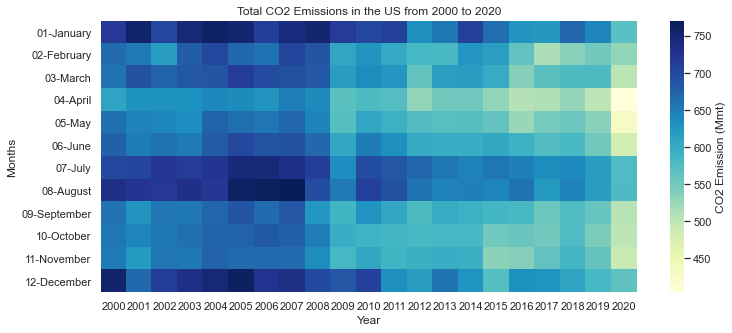

In [58]:
#Reading the Data Set
co2_emissions = pd.read_csv("Master_Data_Monthly_CO2Emissions.csv")
A_co2_emission_heatmap=co2_emissions

#Converting to Numeric type
A_co2_emission_heatmap["Coal_CO2Emissions"]=pd.to_numeric(A_co2_emission_heatmap["Coal_CO2Emissions"],errors='coerce')

#Dropping Sector Column and Total_CO2Emissions column
A_co2_emission_heatmap=A_co2_emission_heatmap.drop(["Sector"],axis=1)
A_co2_emission_heatmap=A_co2_emission_heatmap.drop(["Total_CO2Emissions"],axis=1)

#Removing Unnamed Column
A_co2_emission_heatmap=A_co2_emission_heatmap.loc[:, ~A_co2_emission_heatmap.columns.str.contains('^Unnamed')]

#Grouping by Date and taking Total
A_co2_emission_heatmap=A_co2_emission_heatmap.groupby('Month',as_index=False).sum()

#Adding Total Column
A_co2_emission_heatmap["Total"]=A_co2_emission_heatmap.iloc[:,1:].sum(axis=1)

#Modfying Data Set
A_co2_emission_heatmap=A_co2_emission_heatmap[['Month','Total']]

#Seperating Date Columns
A_co2_emission_heatmap['Year']=A_co2_emission_heatmap['Month'].str[:4]
A_co2_emission_heatmap['Months']=A_co2_emission_heatmap['Month'].str[5:7]
A_co2_emission_heatmap=A_co2_emission_heatmap.drop(["Month"],axis=1)

#Adding index to Month
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '01', 'Months'] = '01-January'
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '02', 'Months'] = '02-February'
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '03', 'Months'] = '03-March'
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '04', 'Months'] = '04-April'
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '05', 'Months'] = '05-May'
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '06', 'Months'] = '06-June'
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '07', 'Months'] = '07-July'
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '08', 'Months'] = '08-August'
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '09', 'Months'] = '09-September'
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '10', 'Months'] = '10-October'
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '11', 'Months'] = '11-November'
A_co2_emission_heatmap.loc[A_co2_emission_heatmap['Months'] == '12', 'Months'] = '12-December'


#Filtering data till for year 2000 to 2020
filter1 = A_co2_emission_heatmap["Year"]<"2021"
filter2 = A_co2_emission_heatmap["Year"]>="2000"
A_co2_emission_heatmap.where(filter1 & filter2, inplace = True)
A_co2_emission_heatmap=A_co2_emission_heatmap.dropna(how='all')

#Creating a Pivot for populating heatmap
A_co2_emission_heatmap=A_co2_emission_heatmap.pivot("Months","Year","Total")

#Sorting the Data
A_co2_emission_heatmap.sort_index(level=0, ascending=True, inplace=True)

#Plotting the Heatmap
sns.set(rc = {'figure.figsize':(12,5)})
sns.heatmap(A_co2_emission_heatmap, cmap="YlGnBu",cbar_kws={'label': 'CO2 Emission (Mmt)'}).set(title="Total CO2 Emissions in the US from 2000 to 2020")

<b>The above Heatmap represents the total CO2 emissions in the US from the year 2000 till the year 2020. The X-Axis represents the years and the Y-Axis represent the months of a year. The color bar at right represents the numeric value of CO2 emissions in Mmt.
As we can see, the CO2 emission were highest from year 2000 till the year 2008. There is a gradual decrease in the Co2 emissions from 2008. moreover there is a significant decrease in the year 2020 which can be due to Covid lockdowns </b>

In [59]:
#Subset data to include period from 2000 to 2020
GH_co2_emissions_2000_to_2020=co2_emissions.loc[(co2_emissions["Month"] >= "2000-01-01") 
                                             & (co2_emissions["Month"]<= "2020-12-01")]


                                         

In [60]:
# Caclulate the avarage of total Co2 emissions for period from 2000 to 2020 at the granularity of each sector

GH_co2_emissions_2000_to_2020_sector_mean = GH_co2_emissions_2000_to_2020.groupby("Sector")["Total_CO2Emissions"].mean()


Total GHG Emissions by all 4 sectors 554.8966468253967

Percentages contribution of each sector [0.3154498347701028, 0.23412116177361922, 0.16863372705148771, 0.28179527640479035]

GHG emissions sectors category ['electric', 'industrial', 'residential', 'transportation']


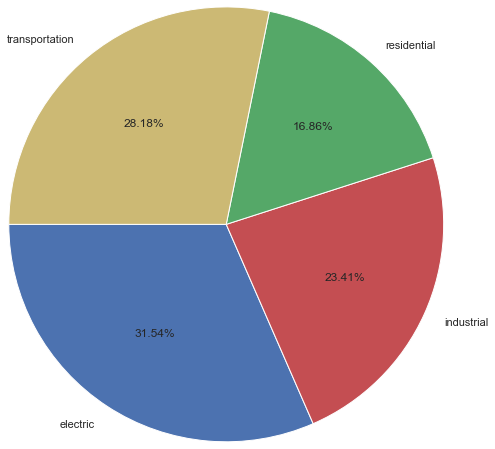

In [61]:
# Calculate the portion covered by each sector then Plotting the Pie chart

#sectors=[]
GH_sum_sectors= sum(GH_co2_emissions_2000_to_2020_sector_mean.values)

print("Total GHG Emissions by all 4 sectors", GH_sum_sectors)

pie_portions = [GH_co2_emissions_2000_to_2020_sector_mean.values[0]/GH_sum_sectors,GH_co2_emissions_2000_to_2020_sector_mean.values[1]/GH_sum_sectors,GH_co2_emissions_2000_to_2020_sector_mean.values[2]/GH_sum_sectors,GH_co2_emissions_2000_to_2020_sector_mean.values[3]/GH_sum_sectors]

print("\nPercentages contribution of each sector", pie_portions)

GH_sector = [x for x in GH_co2_emissions_2000_to_2020_sector_mean.keys()]
  

print("\nGHG emissions sectors category", GH_sector)



#print(labels)

GH_colors = ["b","r","g","y"]

plt.pie(pie_portions,labels = GH_sector, colors=GH_colors,explode = (0,0,0,0),startangle=180,radius = 2, autopct = '%2.2f%%')

#plt.title("GHG Emssions by Sector")
plt.show()



<b>The Pi Chart shows a yearly average of percentage contribution of GHG emissions from each sector to total Co2 energy emissions. This yearly average percentage calculated based on historical data from 2000 to 2020. As you can see the economic activities represented by Transportation and industrial contributed more than 50% of total GHG emissions to our environment.</b>

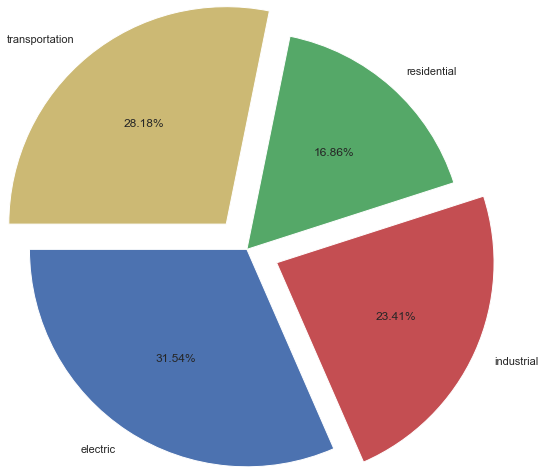

In [62]:
# Recognize the two sectors: Transportation and Industrial that get impacted during the Covid19 pandamic
#by governemnt shulter in place order. 

plt.pie(pie_portions,labels = GH_sector, colors=GH_colors,explode = (0,0.3,0,0.3),startangle=180,radius = 2, autopct = '%2.2f%%')

plt.show()


<b>The above pi chart emphasizing the project focuses for further analysis. As you can see the transportation and industrial sectors are the target for further exploration and analysis. Why, because those the two sectors impacted by government lockdown polices due to the pandemic</b>

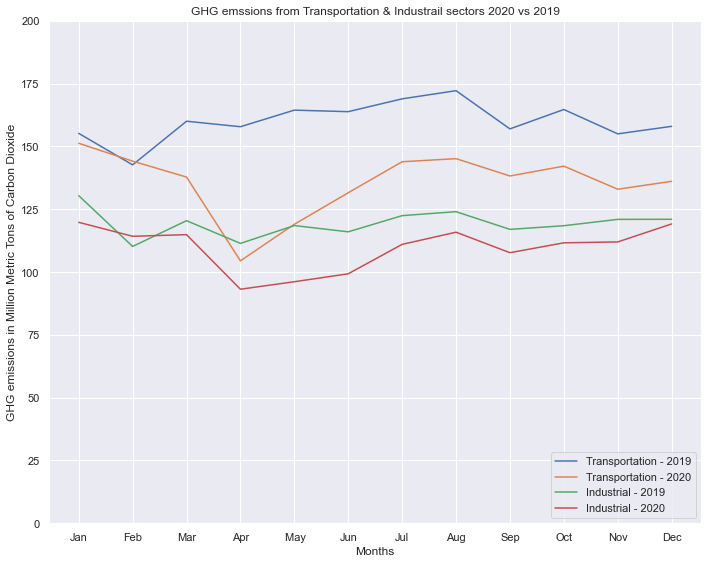

In [63]:
# Plot lines chart showing the Regression of the two sectors Industrial & Transportation accross the years of 2019 & 2020 


GH_month = ["Jan", "Feb","Mar","Apr" ," May" , "Jun" , "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

GH_year_2019 = GH_co2_emissions_2000_to_2020[GH_co2_emissions_2000_to_2020["Month"].str.contains("2019")]

GH_industrial_2019 = GH_year_2019.loc[GH_year_2019["Sector"] == "industrial","Total_CO2Emissions"].values

GH_transportation_2019 = GH_year_2019.loc[GH_year_2019["Sector"] == "transportation","Total_CO2Emissions"].values


GH_year_2020 = GH_co2_emissions_2000_to_2020[GH_co2_emissions_2000_to_2020["Month"].str.contains("2020")]

GH_industrial_2020 = GH_year_2020.loc[GH_year_2020["Sector"] == "industrial","Total_CO2Emissions"].values

GH_transportation_2020 = GH_year_2020.loc[GH_year_2020["Sector"] == "transportation","Total_CO2Emissions"].values

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()

plt.ylim(0,200)
#plt.yticks(np.arange(0,200, 10))

plt.plot(GH_month, GH_transportation_2019, label = "Transportation - 2019")

plt.plot(GH_month, GH_transportation_2020, label = "Transportation - 2020")

plt.plot(GH_month, GH_industrial_2019, label = "Industrial - 2019")

plt.plot(GH_month, GH_industrial_2020, label = "Industrial - 2020")


plt.xlabel("Months")

plt.ylabel("GHG emissions in Million Metric Tons of Carbon Dioxide")


plt.title("GHG emssions from Transportation & Industrail sectors 2020 vs 2019")

plt.legend(loc = "lower right")



<b>The above line chart shows GHG emissions from transportation and Industrial sector for the year of 2020 vs 2019. The x-axis represent the month of the years, the y-axis represent the emissions of million metric tuns of carbon dioxide. emissions from transportation sector of year 2019 and 2020 represented the blue and orange line respectively. While the emissions from industrial sector for the year of 2019 and 2020 represented by the green and red line respectively. As you can see at end February and early march once the government implemented covid 19 mobility restrictions on community mobility and industry & retail closing, the CO2 emissions dropped drastically and changed the pattern. but as the government started to soft their restrictions polices at early may in some states and July in others, the CO2 emissions bounced back gradually, but still below the previous year due to the soft opening. So Covid 19 had impacted positively on our Environment.</b>

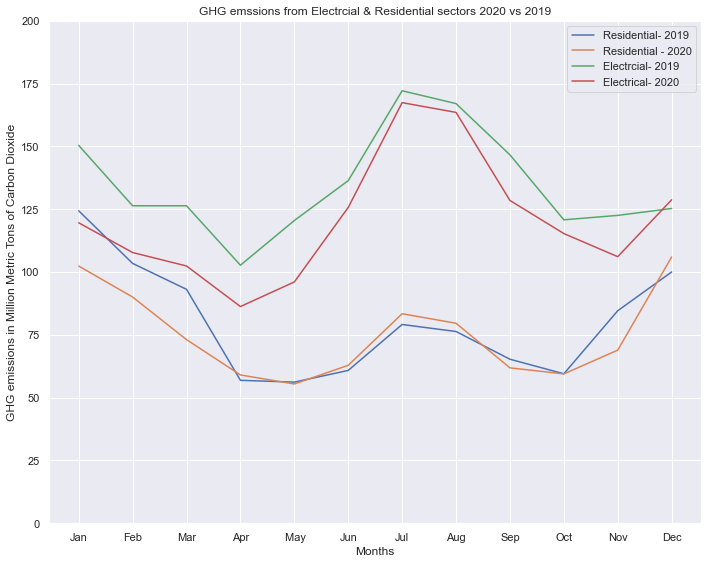

In [64]:
# Plot lines chart showing the Regression of the two sectors Risidential & electric accross the years of 2019 & 2020  

GH_month = ["Jan", "Feb","Mar","Apr" ," May" , "Jun" , "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

GH_residential_2019 = GH_year_2019.loc[GH_year_2019["Sector"] == "residential","Total_CO2Emissions"].values

GH_residential_2020 = GH_year_2020.loc[GH_year_2020["Sector"] == "residential","Total_CO2Emissions"].values

GH_elec_2019 = GH_year_2019.loc[GH_year_2019["Sector"] == "electric","Total_CO2Emissions"].values

GH_elec_2020 = GH_year_2020.loc[GH_year_2020["Sector"] == "electric","Total_CO2Emissions"].values


plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.ylim(0,200)


plt.plot(GH_month, GH_residential_2019, label = "Residential- 2019")
plt.plot(GH_month, GH_residential_2020, label = "Residential - 2020")

plt.plot(GH_month, GH_elec_2019, label = "Electrcial- 2019")
plt.plot(GH_month, GH_elec_2020, label = "Electrical- 2020")

plt.xlabel("Months")

plt.ylabel("GHG emissions in Million Metric Tons of Carbon Dioxide")

plt.title("GHG emssions from Electrcial & Residential sectors 2020 vs 2019")

plt.legend(loc = "best")


<b>The above line chart shows the GHG emissions from the other sectors, Industrial and electric energy for the year of 2020 vs 2019. The x-axis represent the month of the year, the y-axis represent the emissions in million metric tuns of carbon dioxide. The green and red lines represent the emissions due to Electric sector for the year of 2019 and 2020 respectively. While the blue and orang lines represent the co2 emissions from residential sector of year 2019 and 2020 respectively. As you can see, there is slight drop in co2 emissions from electric sector in 2020 compared to 2019, but that was due to the drop in secondary emissions due to drop in production and consumption energy activities from industrial and transportation sectors. for residential sector there is no obvious changes in pattern in this sector.</b> 

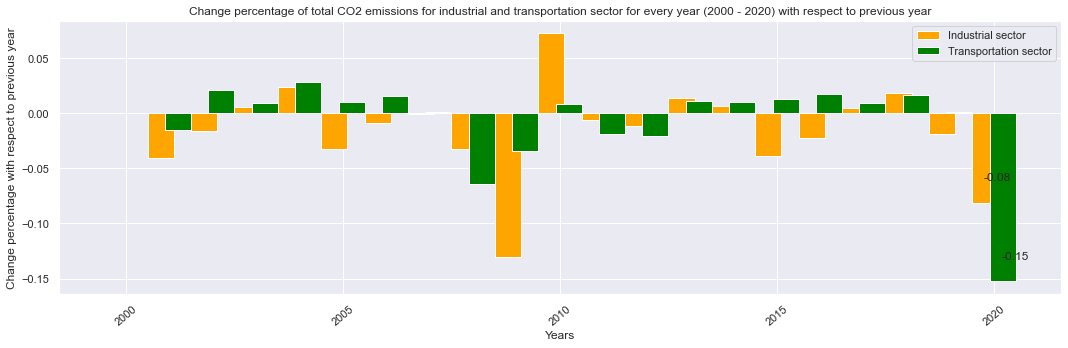

In [65]:
'''
Firstly, imported the essential libraries like pandas as pd and matplotl
ib as plt. To extract the data from the csv file and
store it into a dataframe called data, read_csv() is used.Inorder to fil
ter this data by getting rid of all the null values,
filterwarnings() used to ignore the warnings Converted the date formate to month and year.
From the entire dataset only did manipulation to get the percent change  of CO2 Emission for two sectors i.e 
Transport and Industrial Sector for every year (2000-2020)
bar graph which are as follows 
The date format data set is converted into Years by using the Groupby function 

Caluclated the change percentage of Total_Co2Emissions with respect to previous year for the two sectors Industrial 
and Transport sector for the time period 2000-2020
change_value = ((current_value - old_value) / old_value)

In the Bargraph X-axis represent Change percentage with respect to previous year the range is -0.15 to 0.05 and Y-axis 
represent the years 2000-2020

'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Master_Data_Monthly_CO2Emissions.csv', index_col = 0)
df['Month'] = pd.to_datetime(df['Month'])
df['Year'] = df['Month'].dt.strftime('%Y')
df['Year'] = df['Year'].astype(int)
df = df[df['Year']>=2000]
df = df[df['Year']<=2020]

df_ind = df[df['Sector'] == 'industrial']
df_ind = df_ind.drop(['Sector', 'Month'], axis=1)
df_ind = df_ind.groupby(['Year']).sum()
df_ind.reset_index(inplace=True)
df_ind['Change_Percentage'] = 0.0

old_value = df_ind.at[0,'Total_CO2Emissions']
for index, row in df_ind.iterrows():
    if index != 0:
        current_value = row['Total_CO2Emissions']
        change_value = ((current_value - old_value) / old_value)
        old_value = current_value
        df_ind.at[index,'Change_Percentage'] = change_value




df_transport = df[df['Sector'] == 'transportation']
df_transport = df_transport.drop(['Sector', 'Month'], axis=1)
df_transport = df_transport.groupby(['Year']).sum()
df_transport.reset_index(inplace=True)
df_transport['Change_Percentage'] = 0.0

old_value = df_transport.at[0,'Total_CO2Emissions']
for index, row in df_transport.iterrows():
    if index != 0:
        current_value = row['Total_CO2Emissions']
        change_value = ((current_value - old_value) / old_value)
        old_value = current_value
        df_transport.at[index,'Change_Percentage'] = change_value
    



plt.rcParams['figure.figsize'] = [15, 5]
ax = plt.axes()
plt.bar(df_ind['Year'] - 0.2, df_ind['Change_Percentage'], width =0.6, color = ['orange'], label='Industrial sector')
x_offset = -0.03
y_offset = 0.02
b = ax.patches[-1].get_bbox()
val = "{:+.2f}".format(b.y1 + b.y0)        
ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.bar(df_transport['Year'] + 0.2, df_transport['Change_Percentage'], width =0.6, color = ['Green'], label='Transportation sector')
x_offset = -0.03
y_offset = 0.02
b = ax.patches[-1].get_bbox()
val = "{:+.2f}".format(b.y1 + b.y0)        
ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.xlabel('Years') 
plt.xticks(rotation = 40)
plt.ylabel('Change percentage with respect to previous year') 
plt.title('Change percentage of total CO2 emissions for industrial and transportation sector for every year (2000 - 2020) with respect to previous year')
plt.legend()
plt.show()


<b>The above BarChart represents percentage change with respect to the previous year if there is no change in percentage then
the value is 0.00 if the change in percentage is negative then the graph is represented below the 0.00 i.e the negative 
value -0.05,-0.10,-0.15 and if the percentage is positive then the graph is represented above the 0.00 i.e the positive
value 0.05

We can observe that the year 2020 has the change of percentage decrease might be due to the impact of Covid in the both 
Industrial and Transportation sector.</b>

Text(0.5, 1.0, 'CO2 emission for Industrial Sector in the US from 2000 to 2020 ')

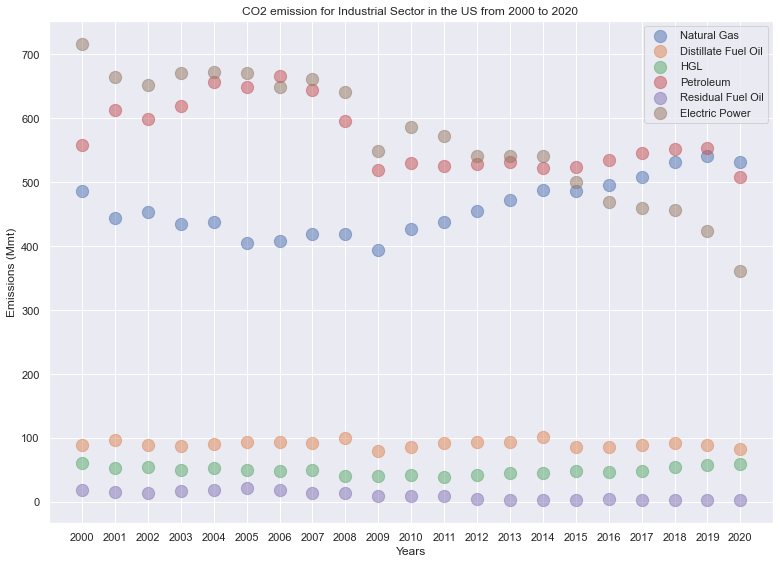

In [66]:
co2_emission=co2_emissions
A_co2_emission_scatter=co2_emission

#Splitting Month and Year as two seperate columns
new_month=co2_emission["Month"].str[5:-3]
new_year=co2_emission["Month"].str[:4]
co2_emission["Month"]=new_month
co2_emission["Year"]=new_year

#Removing Unnamed Column
A_co2_emission_scatter=A_co2_emission_scatter.loc[:, ~A_co2_emission_scatter.columns.str.contains('^Unnamed')]

#Formatting Year Column
new_format=list(A_co2_emission_scatter.columns)[:-1]
new_format.insert(0,list(A_co2_emission_scatter.columns)[-1])
A_co2_emission_scatter=A_co2_emission_scatter[new_format]

#Filtering data from year 2000 to 2020
A_co2_emission_scatter[(A_co2_emission_scatter["Year"]<"2021")]
A_co2_emission_scatter=A_co2_emission_scatter[A_co2_emission_scatter["Year"]!="2021"]
A_co2_emission_scatter=A_co2_emission_scatter[A_co2_emission_scatter["Year"]>="2000"]


#Storing data for transportation Sector
A_co2_emission_scatter_transportation=A_co2_emission_scatter[A_co2_emission_scatter["Sector"]=="transportation"]

#Dropping the month Column as we need to Aggregate Data on Yearly level
A_co2_emission_scatter_transportation.drop(['Month'], axis=1)

#Aggregating rows together on a Yerly Level
A_co2_emission_scatter_transportation=A_co2_emission_scatter_transportation.groupby('Year',as_index=False).sum()

#Storing data for Industrial Sector
A_co2_emission_scatter_industrial=A_co2_emission_scatter[A_co2_emission_scatter["Sector"]=="industrial"]

#Dropping the month Column as we need to Aggregate Data on Yearly level
A_co2_emission_scatter_industrial.drop(['Month'], axis=1)

#Aggregating rows together on a Yerly Level
A_co2_emission_scatter_industrial=A_co2_emission_scatter_industrial.groupby('Year',as_index=False).sum()


#Scatter Plot for Industrial Sector
plt.figure(figsize=(11,8))
plt.xlabel('Years')
plt.ylabel('Emissions (Mmt)')
plt.scatter(list(A_co2_emission_scatter_industrial["Year"]),list(A_co2_emission_scatter_industrial['NaturalGas_CO2Emissions']),marker='o',s=150,label='Natural Gas',alpha=0.5)
plt.scatter(list(A_co2_emission_scatter_industrial["Year"]),list(A_co2_emission_scatter_industrial['Distillate_FuelOil_CO2Emissions']),marker='o',s=150,label='Distillate Fuel Oil',alpha=0.5)
plt.scatter(list(A_co2_emission_scatter_industrial["Year"]),list(A_co2_emission_scatter_industrial['HGL_CO2Emissions']),marker='o',s=150,label='HGL',alpha=0.5)
plt.scatter(list(A_co2_emission_scatter_industrial["Year"]),list(A_co2_emission_scatter_industrial['Petroleum_CO2Emissions']),marker='o',s=150,label='Petroleum',alpha=0.5)
plt.scatter(list(A_co2_emission_scatter_industrial["Year"]),list(A_co2_emission_scatter_industrial['Residual_fuelOil_CO2Emissions']),marker='o',s=150,label='Residual Fuel Oil',alpha=0.5)
plt.scatter(list(A_co2_emission_scatter_industrial["Year"]),list(A_co2_emission_scatter_industrial['Share_OfElectricPower_CO2Emissions']),marker='o',s=150,label='Electric Power',alpha=0.5)
plt.legend(loc='best')
plt.title("CO2 emission for Industrial Sector in the US from 2000 to 2020 ")




<b>The above scatter plot represents a comparision between different types of emissions in Industrial Sector from year 2000 till the year 2020. We can see for the year 2020 there is no significant change in the CO2 emissions Residual Fuel Oil,HGL and Distillate Fuel Oil but there is a significant impact in Petroluem and Electric Power Sector </b>

Text(0.5, 1.0, 'CO2 emission for Transportation Sector in the US from 2000 to 2020 ')

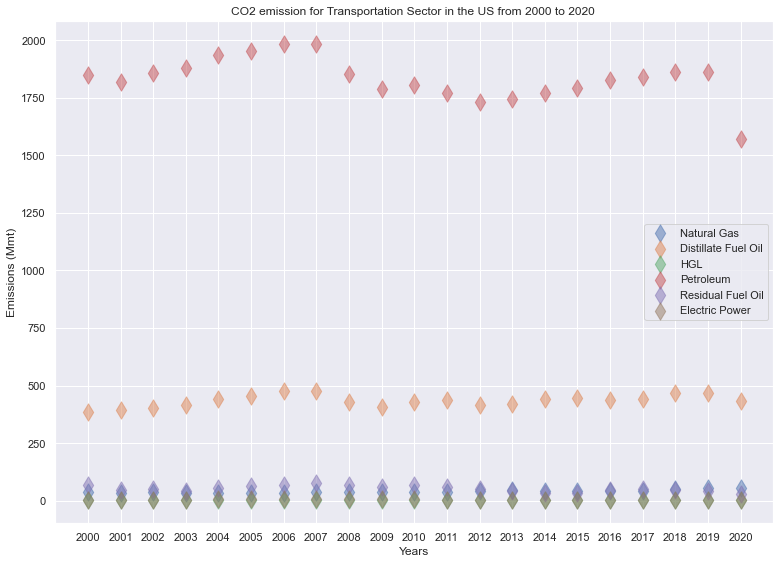

In [67]:
#Scatter Plot for Industrial Sector
plt.figure(figsize=(11,8))
plt.xlabel('Years')
plt.ylabel('Emissions (Mmt)')
plt.scatter(list(A_co2_emission_scatter_transportation["Year"]),list(A_co2_emission_scatter_transportation['NaturalGas_CO2Emissions']),marker='d',s=150,label="Natural Gas",alpha=0.5)
plt.scatter(list(A_co2_emission_scatter_transportation["Year"]),list(A_co2_emission_scatter_transportation['Distillate_FuelOil_CO2Emissions']),marker='d',s=150,label="Distillate Fuel Oil",alpha=0.5)
plt.scatter(list(A_co2_emission_scatter_transportation["Year"]),list(A_co2_emission_scatter_transportation['HGL_CO2Emissions']),marker='d',s=150,label="HGL",alpha=0.5)
plt.scatter(list(A_co2_emission_scatter_transportation["Year"]),list(A_co2_emission_scatter_transportation['Petroleum_CO2Emissions']),marker='d',s=150,label="Petroleum",alpha=0.5)
plt.scatter(list(A_co2_emission_scatter_transportation["Year"]),list(A_co2_emission_scatter_transportation['Residual_fuelOil_CO2Emissions']),marker='d',s=150,label="Residual Fuel Oil",alpha=0.5)
plt.scatter(list(A_co2_emission_scatter_transportation["Year"]),list(A_co2_emission_scatter_transportation['Share_OfElectricPower_CO2Emissions']),marker='d',s=150,label="Electric Power",alpha=0.5)
plt.legend(loc='best')
plt.title("CO2 emission for Transportation Sector in the US from 2000 to 2020 ")


<b>The above scatter plot represents a comparision between different types of emissions in Transportation Sector from year 2000 till the year 2020. We can see for the year 2020 there is significant change in the CO2 Emissions for Petroleum but there is a no significant change in other Sectors. It can be a result of Covid Lockdowns and restriction of movement of people.</b>

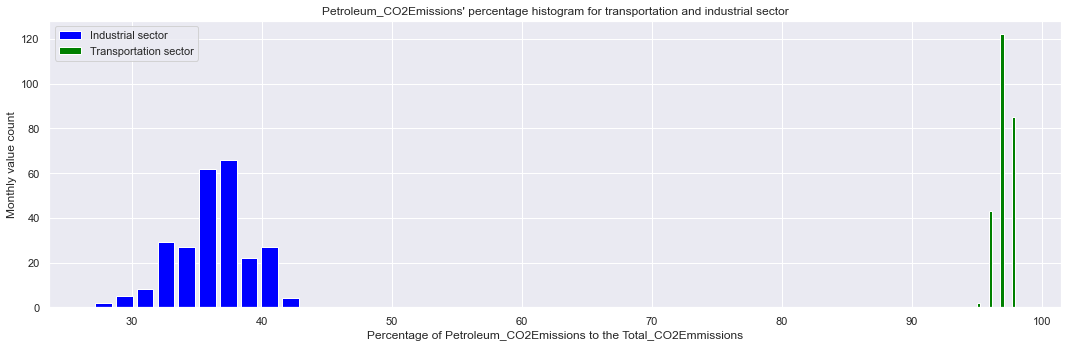

In [68]:
#For histograms, lets calculate the percentage of Petroleum_CO2Emissions to the Total_CO2Emmissions

#Monthly from 2000 to 2020
'''Firstly, imported the essential libraries like pandas as pd and matplotl
ib as plt. To extract the data from the csv file and
store it into a dataframe called data, read_csv() is used.Inorder to fil
ter this data by getting rid of all the null values,
filterwarnings() used to ignore the warnings Converted the date formate to month and year.
From the entire dataset only did manipulation to get the percent change  of CO2 Emission for two sectors i.e 
Transport and Industrial Sector for every year (2000-2020)
Histogram which are as follows 

A histogram is a chart that shows frequencies for intervals of values of
a metric variable.In my case, I have used the
frequencies of precentage of Petroleum_Co2Emissions to the Total Co2 Emission

Caluclated the percentager of Petroleum_Co2Emission of Industrial sector and Transportation sector
with Total_CO2Emissions monthly from 2000 to 2020
Range is created by Min value and Max value
Bin size is taken as 10

It is a statistical representation of this data where,The Y-axis(The Vertical axis) in the histogram represents the monthly value count and X-axis
 (The Horizontal axis)represents the Percentage of Petroleum_CO2Emissions to the Total_CO2Emmissions
 
 
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Master_Data_Monthly_CO2Emissions.csv', index_col = 0)
df['Month'] = pd.to_datetime(df['Month'])
df['Year'] = df['Month'].dt.strftime('%Y')
df['Year'] = df['Year'].astype(int)
df = df[df['Year']>=2000]
df = df[df['Year']<=2020]

df_indust = df[df['Sector'] == 'industrial']
df_trans = df[df['Sector'] == 'transportation']

df_indust['Petroleum_ratio_to_Total'] = 0
for index, row in df_indust.iterrows():
    value = (row['Petroleum_CO2Emissions'] / row['Total_CO2Emissions']) * 100
#     value = round(value)
    df_indust.at[index,'Petroleum_ratio_to_Total'] = value
    
df_trans['Petroleum_ratio_to_Total'] = 0
for index, row in df_trans.iterrows():
    value = (row['Petroleum_CO2Emissions'] / row['Total_CO2Emissions']) * 100
#     value = round(value)
    df_trans.at[index,'Petroleum_ratio_to_Total'] = value
    
    
values_list_indust = df_indust['Petroleum_ratio_to_Total'].tolist()
min_value_indust = math.floor(np.min(values_list_indust))
max_value_indust = math.ceil(np.max(values_list_indust))
values_list_trans = df_trans['Petroleum_ratio_to_Total'].tolist()
min_value_trans = math.floor(np.min(values_list_trans))
max_value_trans = math.ceil(np.max(values_list_trans))
range_indus = (min_value_indust, max_value_indust)
range_trans = (min_value_trans, max_value_trans)

bins = 10
plt.hist(values_list_indust, bins, range_indus,color = 'blue', histtype = 'bar', rwidth = 0.8, label='Industrial sector')
plt.hist(values_list_trans, bins, range_trans,color = 'green', histtype = 'bar', rwidth = 0.8, label='Transportation sector') 
plt.xlabel('Percentage of Petroleum_CO2Emissions to the Total_CO2Emmissions') 
plt.ylabel('Monthly value count') 
plt.title('Petroleum_CO2Emissions\' percentage histogram for transportation and industrial sector')
plt.legend()
plt.show()


<b>A histogram is a chart that shows frequencies for intervals of values of a metric variable.In my case, I have used the frequencies of precentage of Petroleum_Co2Emissions to the Total Co2 Emission. Caluclated the percentager of      Petroleum_Co2Emission of Industrial sector and Transportation sector with Total_CO2Emissions monthly from 2000 to 2020
Range is created by Min value and Max value Bin size is taken as 10. It is a statistical representation of this data where,The Y-axis(The Vertical axis) in the histogram represents the monthly value count and X-axis (The Horizontal axis)represents the Percentage of Petroleum_CO2Emissions to the Total_CO2Emmissions. Monthly Value count represents the frequency ie the values (percentages repeated How many times).Percentage is caluclated for Transportation sector and Industrial Sector for Petroleum_Co2 Emissions with respect to Total_Co2Emissions. For Industrial Sector the frequency is between 28% to 42%. Transportation Sector is the highest among two where it has between 94% to 97%</b>

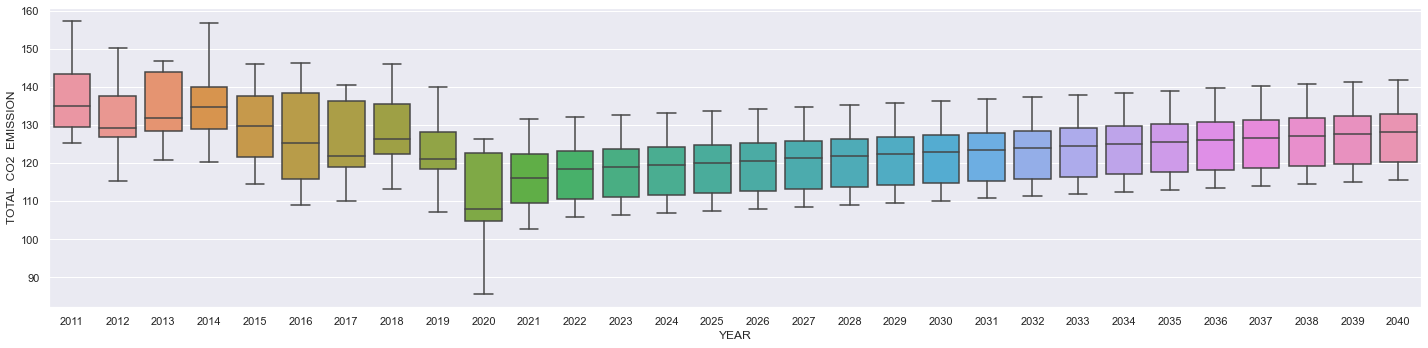

In [69]:

# importing csv file
sg_var_emission = pd.read_csv("CO2EmissionsForecast.csv")

# seperating year column from date column
sg_var_emission['year'] = pd.DatetimeIndex(sg_var_emission['Month']).year

#creating new dataframe with only year and Total_CO2Emissions as columns
sg_var_emission = sg_var_emission[['year','Total_CO2Emissions']]

#creating new dataframe with only specific years
sg_var_emission = sg_var_emission [(sg_var_emission['year'].isin([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040]))]

#assigning values of x and y for BoxPlot
x = 'year'
y = 'Total_CO2Emissions'

plt.figure(figsize =(20, 5))
    
# Creating plot
output = sns.boxplot(x = x, y = y, data = sg_var_emission)

plt.xlabel("YEAR")
plt.ylabel("TOTAL  CO2  EMISSION")

# show plot
plt.show()

<b>The above box plot describes the forecast of Total CO2 emission over the next 20 years. The box plot has on an average range of 40 till the year2019. And in the year 2020, the minimum, the median and the maximum falls drastically. And as per the linear forecast based on previous data, the maximum value is expected to rise in the following 20 years.</b>

# CONSLUSION

<b>As observed from the Above analysis plots, from the year 2000, the amount of Total CO2 Emission is minimum in the year 2020 because of the reduction in economic and domestic activities due to COVID-19 pandemic.

The forecasted data shows that the CO2 emission will increase linearly in the upcoming years for the next 20 years as these activities bounced back, and hence a substitute energy like renewable resources should be used to aim control global worming phenomena and prevent any further harm to the environment.</b>